## Data Science Class with Onoja Anthony, PhD (Email: donmaston09@gmail.com)
### Follow our Page on FaceBook: DataEdge Academy
#### Subscribe to our YouTube channel: @tonyonoja7880
#### Note: to run this script, you have to install the relevant Python packages and the datasets.

### Recap: Introduction to Responsible AI and Explainable AI (XAI)
Responsible AI refers to the development and deployment of artificial intelligence systems in a way that is ethical, transparent, fair, and accountable. It ensures that AI decisions can be trusted, do not harm individuals or society, and comply with legal and moral standards.

- Explainable AI (XAI) is a key part of responsible AI. It focuses on making AI models and their decisions understandable to humans. By opening the “black box” of complex models, XAI helps users and stakeholders see why and how decisions are made, which builds trust and allows for better oversight and improvement.

#### Dataset:
Breast Cancer Wisconsin (Diagnostic) dataset — a widely used dataset containing features computed from digitized images of breast mass biopsies, labeled as malignant or benign.

##### Aims and Objectives:

- To understand the process of building and interpreting machine learning classification models.

- To gain practical experience using Explainable AI tools, specifically the ExplainerDashboard, for interpreting model predictions and feature importance.

- To learn how to visualize and analyze model diagnostics such as ROC curves, confusion matrices, and SHAP values.

#### Takeaways for Students:

- Hands-on experience with building and evaluating a classification model on real medical data.

- Practical knowledge of explainability techniques that improve model transparency and trust.

- Skills to communicate model insights effectively to both technical and non-technical audiences.

- Awareness of the importance of model interpretation in sensitive domains like healthcare.



In [1]:
#!pip install explainerdashboard

In [2]:
# Load the relevant python packages 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer


In [3]:
# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

### EDA Phase

In [4]:
# Combine for EDA
df = X.copy()
df['target'] = y

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
# Basic statistics
display(df.describe())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


C:\Users\Hp\AppData\Local\Temp\ipykernel_43012\578901991.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target_str', data=df, palette={'0': 'steelblue', '1': 'darkred'})


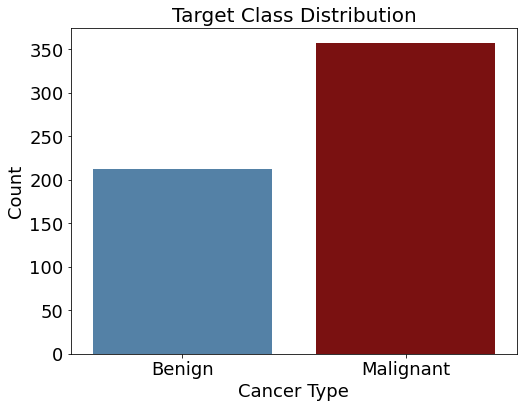

In [8]:
# Check for Class balance in the target set 
import seaborn as sns
import matplotlib.pyplot as plt

# Convert target to string so it matches palette keys
df['target_str'] = df['target'].astype(str)

plt.figure(figsize=(8, 6))
sns.countplot(x='target_str', data=df, palette={'0': 'steelblue', '1': 'darkred'})

plt.title("Target Class Distribution", fontsize=20)
plt.xticks(ticks=[0, 1], labels=['Benign', 'Malignant'], fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Cancer Type", fontsize=18)
plt.ylabel("Count", fontsize=18)

plt.show()


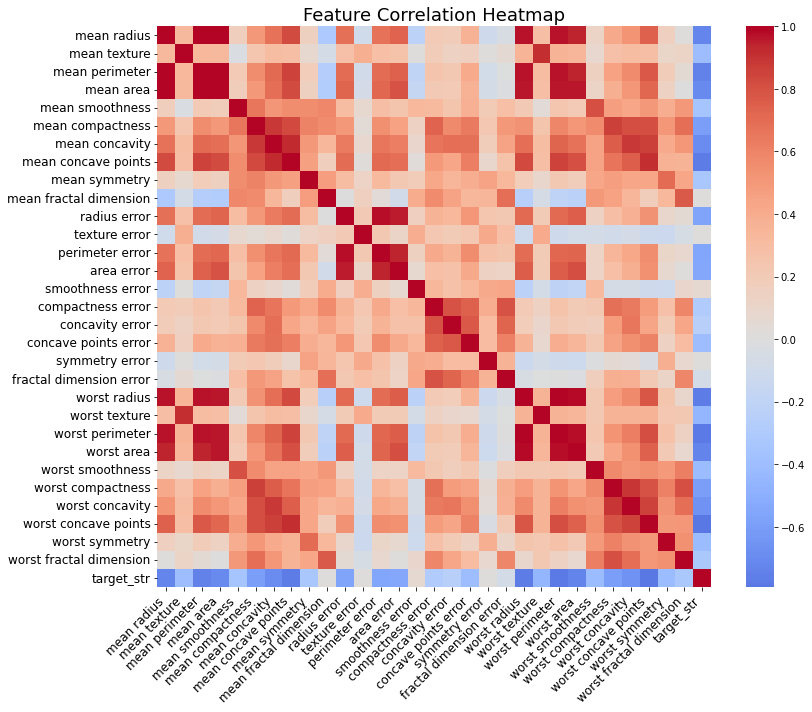

In [9]:
## Visualise correlation heatmap

# Drop target before computing correlation
feature_corr = df.drop(columns=['target']).corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(feature_corr, cmap='coolwarm', center=0)

plt.title("Feature Correlation Heatmap", fontsize=18)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

#### Data Stratification

1. Fair Representation of Classes
Stratification ensures that each class (e.g., benign vs. malignant cases) is proportionally represented in all folds of cross-validation or train-test splits. This is vital for:
- Avoiding bias toward the majority class
- Ensuring model evaluation is fair and realistic
- Preventing minority class underrepresentation, which can be especially harmful in sensitive domains like healthcare or criminal justice

2. Equity in Model Training and Testing
If you didn’t stratify:
- Your model might train mostly on benign cases and rarely see malignant ones

- This would result in a model that’s less accurate—and potentially harmful—for the minority group

- That’s an equity issue: The model serves some groups better than others, violating principles of justice and non-discrimination.

### 5-Fold Stratified Cross-Validation with Feature Importance Tracking

In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import numpy as np

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
feature_names = X.columns
fold_importances = pd.DataFrame(index=feature_names)

for i, (train_idx, val_idx) in enumerate(cv.split(X, y), 1):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    fold_importances[f'Importance_Fold_{i}'] = clf.feature_importances_

fold_importances.to_csv("rf_cv_feature_importances.csv")
fold_importances.head()


,Importance_Fold_1,Importance_Fold_2,Importance_Fold_3,Importance_Fold_4,Importance_Fold_5
mean radius,0.049250,0.039160,0.051109,0.033295,0.050586
mean texture,0.017376,0.010921,0.013091,0.007904,0.009675
mean perimeter,0.075313,0.084139,0.087968,0.057907,0.075918
mean area,0.053982,0.063096,0.049195,0.048495,0.037296
mean smoothness,0.007977,0.007063,0.006036,0.005921,0.008121


#### Select Consistent Features Across All 5 Folds

In [11]:
# Keep only features with non-zero importance in all 5 folds
consistent_features = fold_importances[(fold_importances > 0).all(axis=1)].index.tolist()

print("Selected Consistent Features:", consistent_features)

Selected Consistent Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


#### Feature Selection Phase

#### Build Final Feature DataFrame, Split into Train/Test

In [12]:
from sklearn.model_selection import train_test_split

X_selected = X[consistent_features] #using most consistent features from RF feature importance analysis
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

#### Train Random Forest and XGBoost via GridSearchCV

In [13]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Random Forest
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, None]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3)
rf_grid.fit(X_train, y_train)

# XGBoost
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}
xgb_grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgb_params, cv=3)
xgb_grid.fit(X_train, y_train)

print("Best RF Score:", rf_grid.best_score_)
print("Best XGB Score:", xgb_grid.best_score_)


C:\Users\Hp\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:18:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Hp\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:18:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Hp\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:18:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Hp\anaconda3\Lib\site-packages\xgboost\core

Best RF Score: 0.9582316718949692
Best XGB Score: 0.9648396653886371


C:\Users\Hp\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:18:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [14]:
# --- Classification Report ---
from sklearn.metrics import classification_report, roc_curve, auc, RocCurveDisplay
y_pred_rf = rf_grid.predict(X_test)
y_pred_xgb = xgb_grid.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Benign', 'Malignant']))

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=['Benign', 'Malignant']))


Random Forest Classification Report:
              precision    recall  f1-score   support

      Benign       0.95      0.93      0.94        42
   Malignant       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

XGBoost Classification Report:
              precision    recall  f1-score   support

      Benign       0.95      0.90      0.93        42
   Malignant       0.95      0.97      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



### Feature Importance Analysis

C:\Users\Hp\AppData\Local\Temp\ipykernel_43012\1019375806.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rf.values, y=top_rf.index, palette='Blues_r')


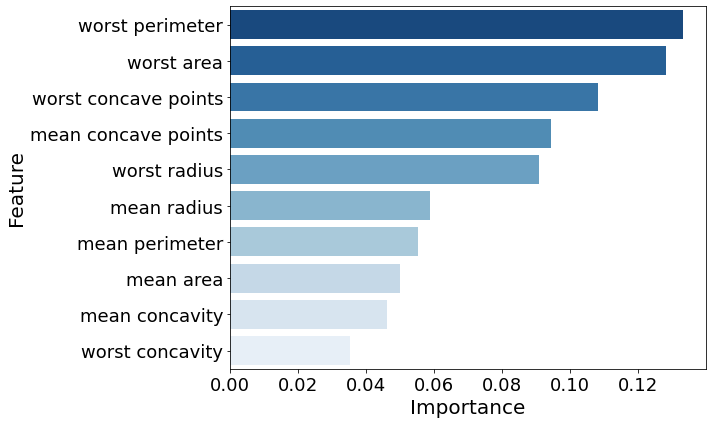

In [15]:
# Random Forest
rf_importances = pd.Series(rf_grid.best_estimator_.feature_importances_, index=X_train.columns)
top_rf = rf_importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_rf.values, y=top_rf.index, palette='Blues_r')
#plt.title("Top 10 Feature Importances - Random Forest", fontsize=16)
plt.xlabel("Importance", fontsize=20)
plt.ylabel("Feature", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_43012\1758475827.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_xgb.values, y=top_xgb.index, palette='Reds_r')


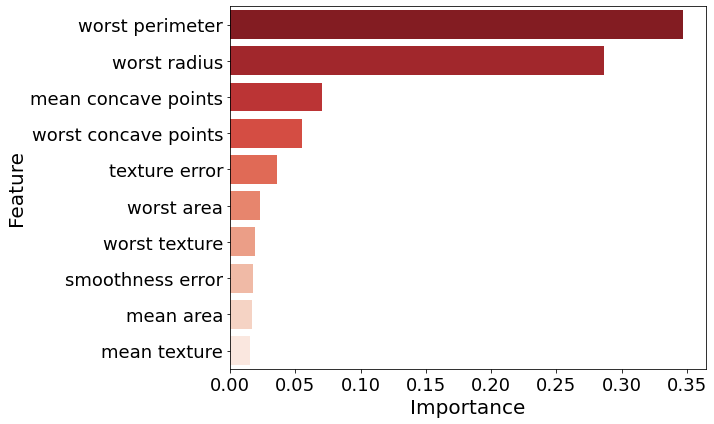

In [16]:
# XGBoost
xgb_importances = pd.Series(xgb_grid.best_estimator_.feature_importances_, index=X_train.columns)
top_xgb = xgb_importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_xgb.values, y=top_xgb.index, palette='Reds_r')
#plt.title("Top 10 Feature Importances - XGBoost", fontsize=16)
plt.xlabel("Importance", fontsize=20)
plt.ylabel("Feature", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.show()

### AUROC Analysis

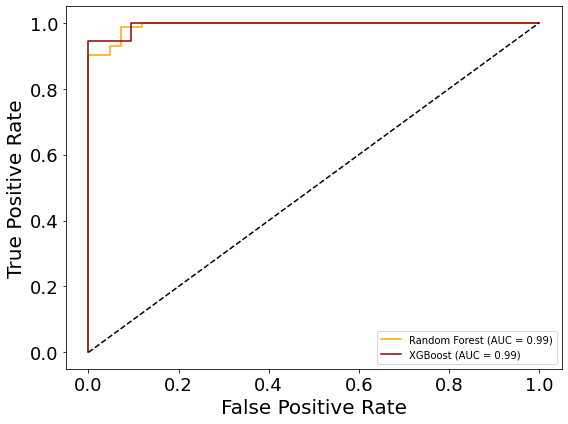

In [17]:
# AUROC Curve
y_prob_rf = rf_grid.predict_proba(X_test)[:, 1]
y_prob_xgb = xgb_grid.predict_proba(X_test)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})", color='orange')
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.2f})", color='darkred')
plt.plot([0, 1], [0, 1], 'k--')

#plt.title("ROC Curve", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=20)
plt.ylabel("True Positive Rate", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc="lower right")
#plt.grid(True)
plt.tight_layout()
plt.show()

### Post-Hoc Model Explanations - Explainer DashBoard

#### Select Best Model and Build ExplainerDashboard

In [18]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard

best_model = rf_grid.best_estimator_ if rf_grid.best_score_ > xgb_grid.best_score_ else xgb_grid.best_estimator_

explainer = ClassifierExplainer(
    best_model,
    X_test,
    y_test,
    labels=["Benign", "Malignant"]
)

Detected XGBClassifier model: Changing class type to XGBClassifierExplainer...
Note: model_output=='probability'. For XGBClassifier shap values normally get calculated against X_background, but paramater X_background=None, so using X instead
Generating self.shap_explainer = shap.TreeExplainer(model, X, model_output='probability', feature_perturbation='interventional')...
Note: Shap interaction values will not be available. If shap values in probability space are not necessary you can pass model_output='logodds' to get shap values in logodds without the need for a background dataset and also working shap interaction values...


In [19]:
#!pip install dash-bootstrap-components==1.4.1 incase you have compatibility issues

#!pip install dash==2.14.2


In [22]:
ExplainerDashboard(explainer, title="Final Model - Breast Cancer Explanation").run(host='127.0.0.1')


Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
Generating layout...
Calculating dependencies...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://192.168.0.16:8050
